# 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
print("Libraries Loaded Successfully!")

Libraries Loaded Successfully!


# 2. Load Dataset

In [4]:

df = pd.read_csv("house_dataset.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())
print(df.tail())



Dataset Loaded Successfully!

   Bedrooms  Bathrooms  Sqft    Location  Age_of_House    Price
0         4          2   929  Industrial            23  2465753
1         5          2  1374     Coastal            24  5633011
2         3          3  2798      Suburb            44  1993581
3         5          3  3756     Coastal            13  6857088
4         5          2   746   Hill Area            22  4296339
     Bedrooms  Bathrooms  Sqft    Location  Age_of_House    Price
695         2          3  3661  Industrial            23  2145072
696         4          3  3683   Hill Area            49  4213846
697         2          4  2734     Coastal            47  4995335
698         2          2  3556      Suburb            20  1995393
699         2          3  2160     Coastal            18  4757774


# 3. Clean & Explore Features

In [5]:
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bedrooms      700 non-null    int64 
 1   Bathrooms     700 non-null    int64 
 2   Sqft          700 non-null    int64 
 3   Location      700 non-null    object
 4   Age_of_House  700 non-null    int64 
 5   Price         700 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 32.9+ KB
None

Missing Values:
Bedrooms        0
Bathrooms       0
Sqft            0
Location        0
Age_of_House    0
Price           0
dtype: int64

Statistical Summary:
         Bedrooms   Bathrooms         Sqft  Age_of_House         Price
count  700.000000  700.000000   700.000000    700.000000  7.000000e+02
mean     3.012857    2.477143  2248.350000     25.661429  3.946751e+06
std      1.447648    1.088787  1012.683159     14.211702  2.090503e+06
min      1.000000    1.000000   601.000000   

# 4. Encode Categorical Features (Location → One-Hot Encoding)

In [6]:
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

print("\nTransformed DataFrame:")
print(df.head())



Transformed DataFrame:
   Bedrooms  Bathrooms  Sqft  Age_of_House    Price  Location_Coastal  \
0         4          2   929            23  2465753             False   
1         5          2  1374            24  5633011              True   
2         3          3  2798            44  1993581             False   
3         5          3  3756            13  6857088              True   
4         5          2   746            22  4296339             False   

   Location_Hill Area  Location_Industrial  Location_Suburb  
0               False                 True            False  
1               False                False            False  
2               False                False             True  
3               False                False            False  
4                True                False            False  


# 5. Correlation Heatmap

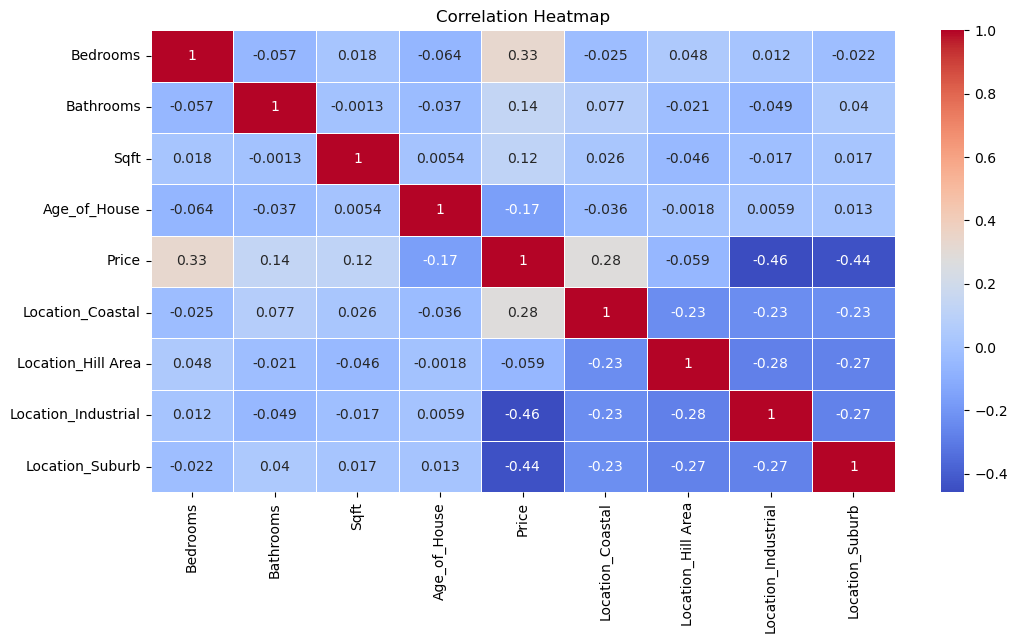

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 5. Select Features (X) and Target (y)

In [8]:
X = df.drop("Price", axis=1)
y = df["Price"]

# 6. Train/Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining samples:", len(X_train))
print("Testing samples:", len(X_test))



Training samples: 560
Testing samples: 140


# 7. Train Linear Regression Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Training Completed!")



Model Training Completed!


# 8. Evaluate Model

In [11]:

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R² Score: {r2}")



Model Evaluation:
RMSE (Root Mean Squared Error): 166015.9496869382
R² Score: 0.9943759079820295


# 9. Interpret Coefficients

In [12]:
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

print("\nIntercept:", model.intercept_)


Model Coefficients:
Bedrooms: 500320.96902845247
Bathrooms: 298776.92793628055
Sqft: 191.76913576573133
Age_of_House: -19763.039207661095
Location_Coastal: -1969241.4650441394
Location_Hill Area: -3514771.560905725
Location_Industrial: -5033153.581796954
Location_Suburb: -4986741.219844513

Intercept: 5017488.3030775525



# 10. Save Model

In [13]:
joblib.dump(model, "house_price_model.pkl")
print("\nModel Saved as 'house_price_model.pkl'")



Model Saved as 'house_price_model.pkl'


# 11. Example Predictions

In [15]:
example_data = pd.DataFrame({
    "Bedrooms": [3],
    "Bathrooms": [2],
    "Sqft": [1500],
    "Age_of_House": [20],
    "Location_Coastal": [1],
    "Location_Hill Area": [0],
    "Location_Industrial": [0],
    "Location_Suburb": [0]
})


prediction = model.predict(example_data)
print("\nExample Predictions:")
print(example_data)
print("Predicted Prices:", prediction)



Example Predictions:
   Bedrooms  Bathrooms  Sqft  Age_of_House  Location_Coastal  \
0         3          2  1500            20                 1   

   Location_Hill Area  Location_Industrial  Location_Suburb  
0                   0                    0                0  
Predicted Prices: [5039156.52048671]
